# 1) Aim

By utilising the heart failure prediction dataset containing comprehensive clinical features and patient data, our aim is to construct and compare various models (Decision Tress, Logestic regression and K-Nearest Neighbour), identifying the most proficient in forecasting and pinpointing the principal factors influencing the likelihood of heart failure.

# 2) Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, precision_recall_curve, roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from yellowbrick.classifier import ClassPredictionError

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

C:\Users\lekha\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



# 3) Exploring the dataset

## 3.1) Overview of the dataset

In [2]:
# Loads a CSV file named "heart.csv" into a Pandas DataFrame named "df"
df = pd.read_csv("heart.csv")

In [3]:
# System
import os
import sys
import configparser
import time
from math import ceil

# Reading and setup data
import cv2
import imutils
from tqdm import tqdm

# Loading datasets
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Modeling
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization


# Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

In [ ]:
preprocess_data(dataset_path, processed_dataset)

In [4]:
# Displays the first few rows (five rows) of the df, offering a quick insight into the dataset's structure and variables
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Displays statistical summary of df
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Displays concise summary of the DataFrame's structure, showcasing column names, data types, and non-null counts per column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Caclulates the sum of duplicated rows
df.duplicated().value_counts()

False    918
Name: count, dtype: int64

There are no duplicated rows to handle in this dataframe.

In [8]:
# Finds the total number of null values for each column
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values to handle in this dataframe.

## 3.2) Analysing the target variable

The target variable is the column <b>"HeartDisease"</b> which contains information regarding the presence or absence of heart disease for each individual.

In [9]:
# Finds the number of unique values in the column "Heart Disease"
df["HeartDisease"].nunique()

2

There are only 2 unique values in the column.

In [10]:
# Counts the number of presence and absence of heart disease and 
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

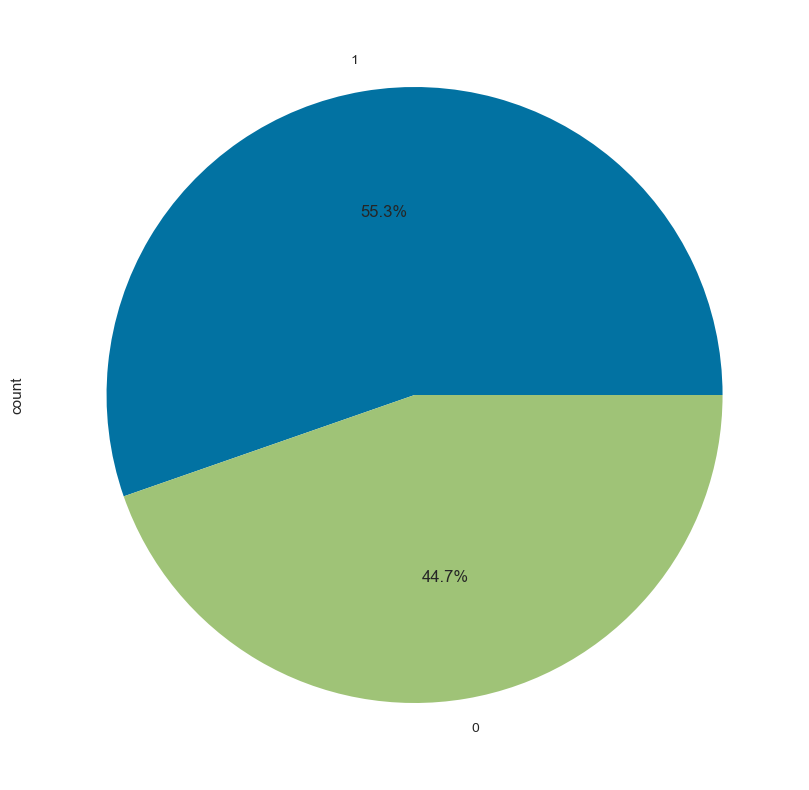

In [11]:
# Displays the count above in pie chart for better visual
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

The dataset exhibits uniform distribution for the target variable

In [12]:
# Displays statistical summary
df[df['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the visualisation, we can see that the main causes of heart diseases are cholesterol, resting blood pressure, maximum heart rate and age.

## 3.3) Analysing numerical and categorical features

In [13]:
numerical = df.drop(['HeartDisease','FastingBS'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

categorical = categorical.append(pd.Index(['FastingBS']))

        
print('Categorical Features :',*categorical)
print('Numerical Features :',*numerical)

Categorical Features : Sex ChestPainType RestingECG ExerciseAngina ST_Slope FastingBS
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


### 3.3.1) Analysing Numerical features

In [14]:
# Displaying first few rows to show the structure of dataframe containing only numerical features
df[numerical].head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [15]:
# Displays statistical summary of numerical features
df[numerical].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


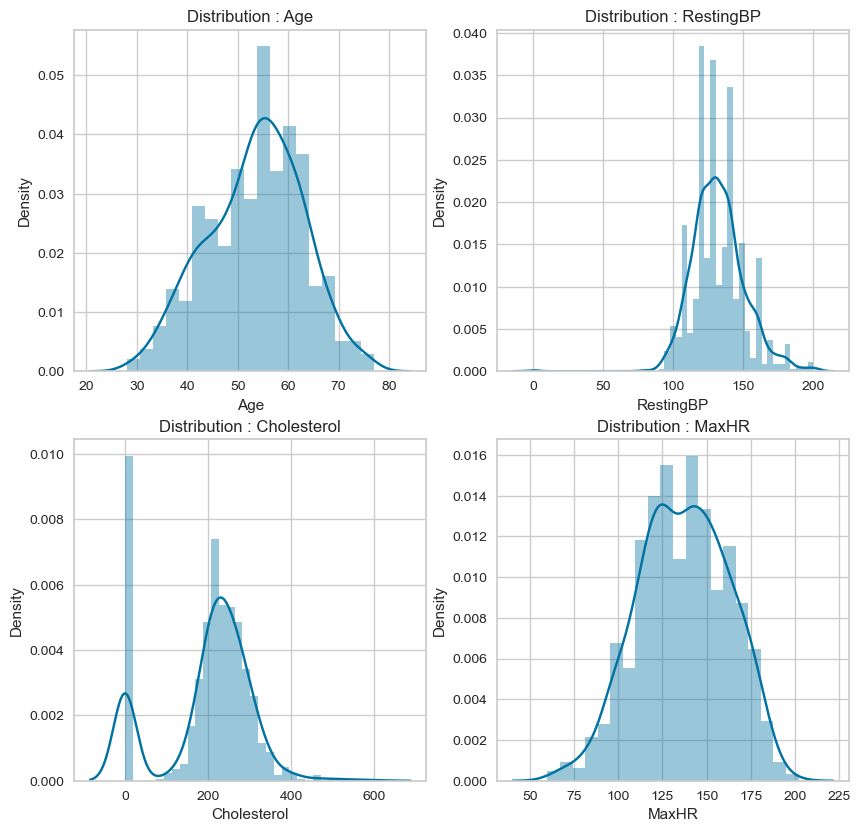

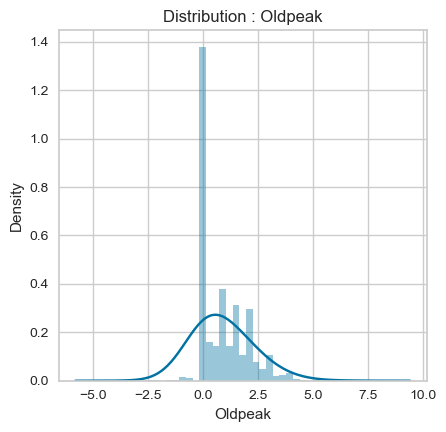

In [16]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numerical[i]])
    title = 'Distribution : ' + numerical[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df[numerical[len(numerical) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + numerical[len(numerical) - 1]
plt.title(title);

The data distribution of 'Oldpeak' is rightly skewed, while 'Cholesterol' exhibits a bimodal distribution.

#### 3.3.1.1) Analysing Numerical features vs Target Variable (HeartDisease)

Dividing the values of the numerical features to look at the results more clearly

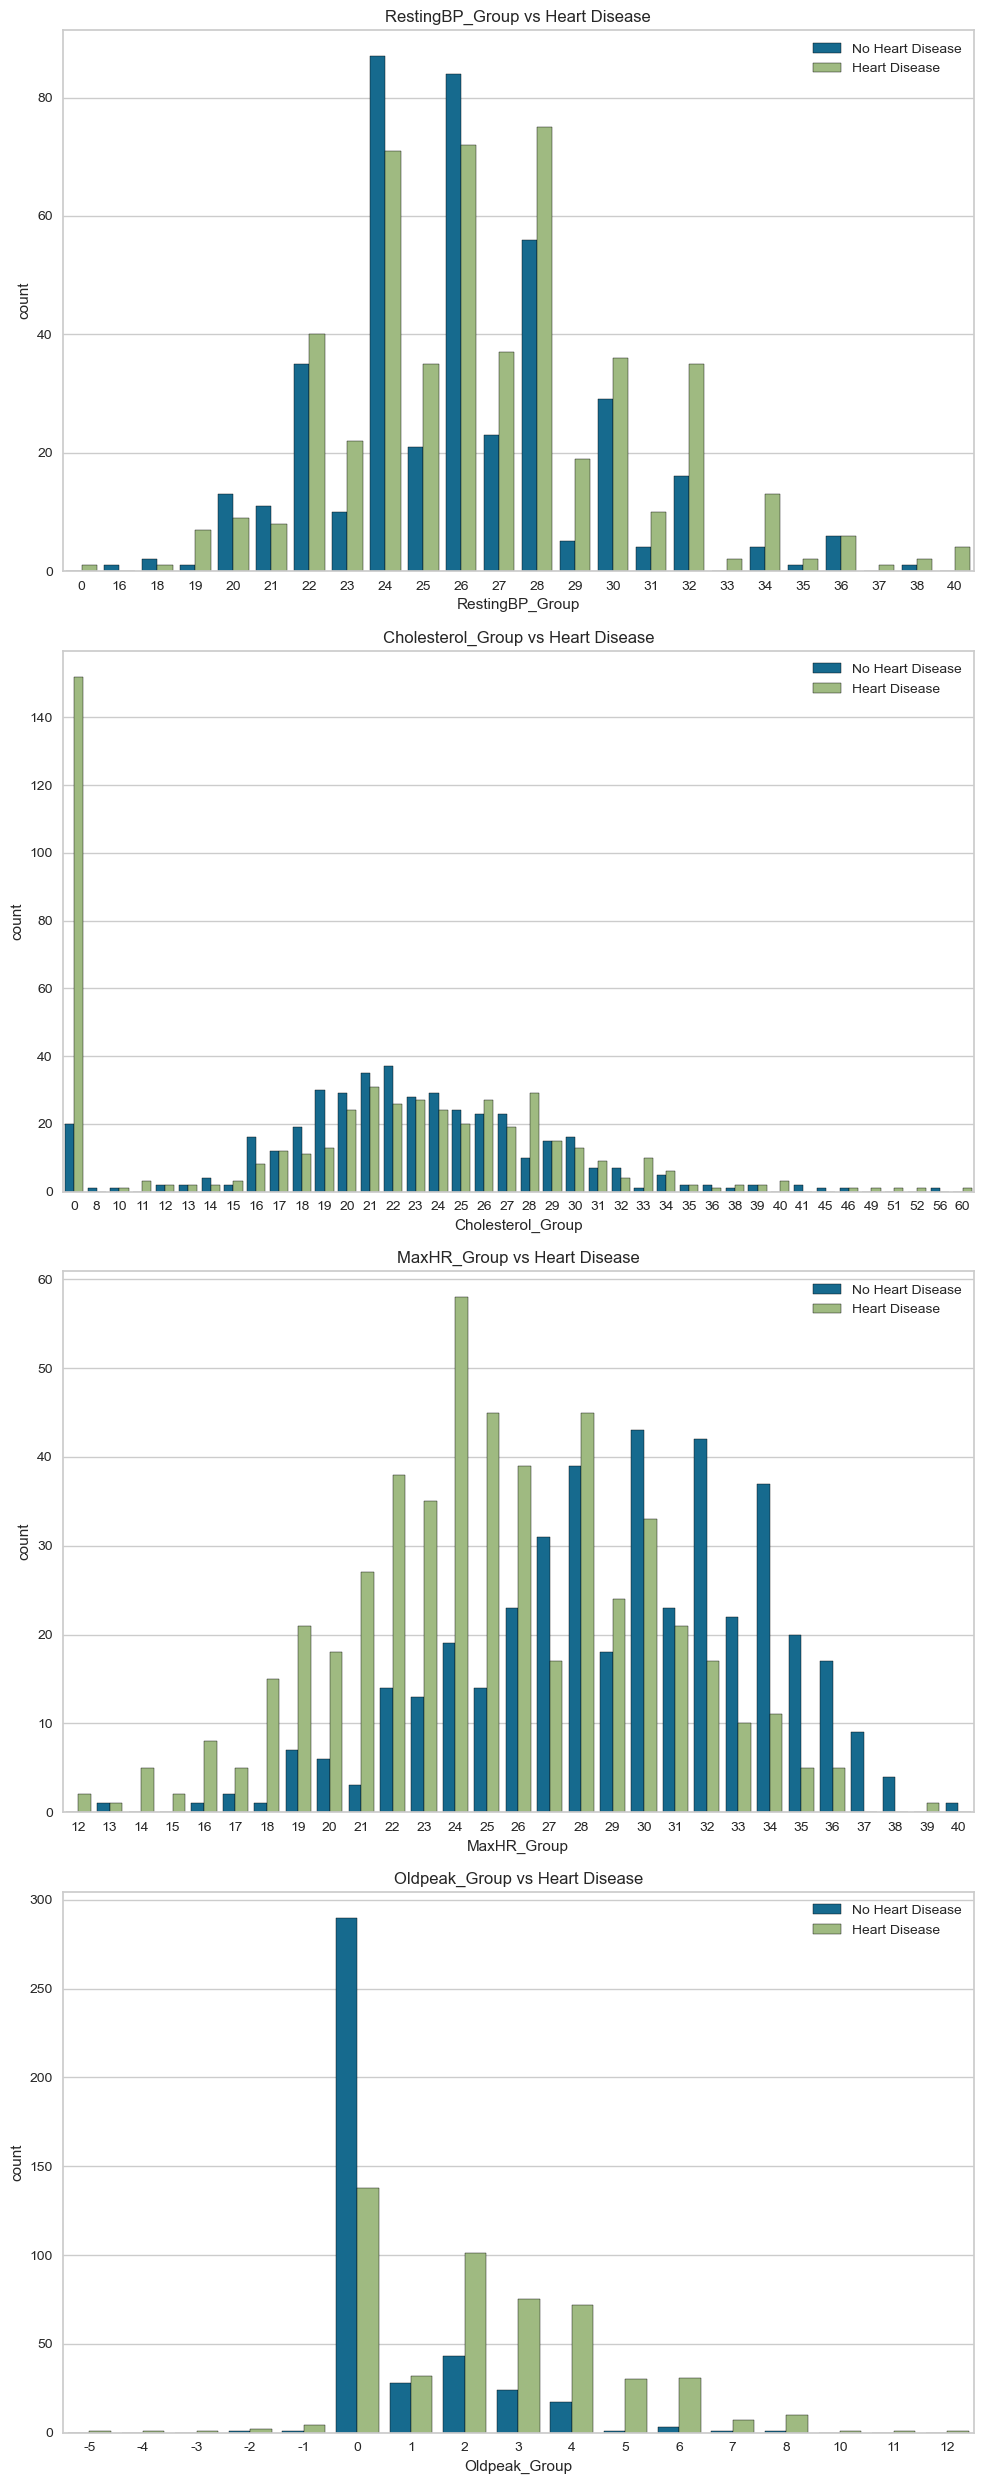

In [17]:
df['RestingBP_Group'] = [int(i / 5) for i in df['RestingBP']]
df['Cholesterol_Group'] = [int(i / 10) for i in df['Cholesterol']]
df['MaxHR_Group'] = [int(i / 5) for i in df['MaxHR']]
df['Oldpeak_Group'] = [int((i * 10) / 5) for i in df['Oldpeak']]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))
group_numerical_features = [i + '_Group' for i in numerical[1:]]  # Assuming numerical is a list of numerical features

for i in range(len(group_numerical_features)):
    plt.subplot(4, 1, i+1)
    sns.countplot(x=group_numerical_features[i], data=df, hue="HeartDisease", edgecolor='black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title)
    
plt.tight_layout()
plt.show()


After multiplying back:
- Heart diseases are particularly prevalent within RestingBP readings ranging from 95 to 170 (19 to 34)
- Cholestrol levels from 160 to 340 (16 to 34)
- MaxHR readings between 70 to 180 (14 to 36), exhibit numerous cases linked to heart diseases
- Oldpeak values spanning 0 to 4 (0 to 8) also show a high likelihood of heart disease diagnosis

### 3.3.2) Analysing Categorical features

In [18]:
# Displaying first few rows to show the structure of dataframe containing only categorical features
df[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS
0,M,ATA,Normal,N,Up,0
1,F,NAP,Normal,N,Flat,0
2,M,ATA,ST,N,Up,0
3,F,ASY,Normal,Y,Flat,0
4,M,NAP,Normal,N,Up,0


In [19]:
#Label encode to transfrom categorical column into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

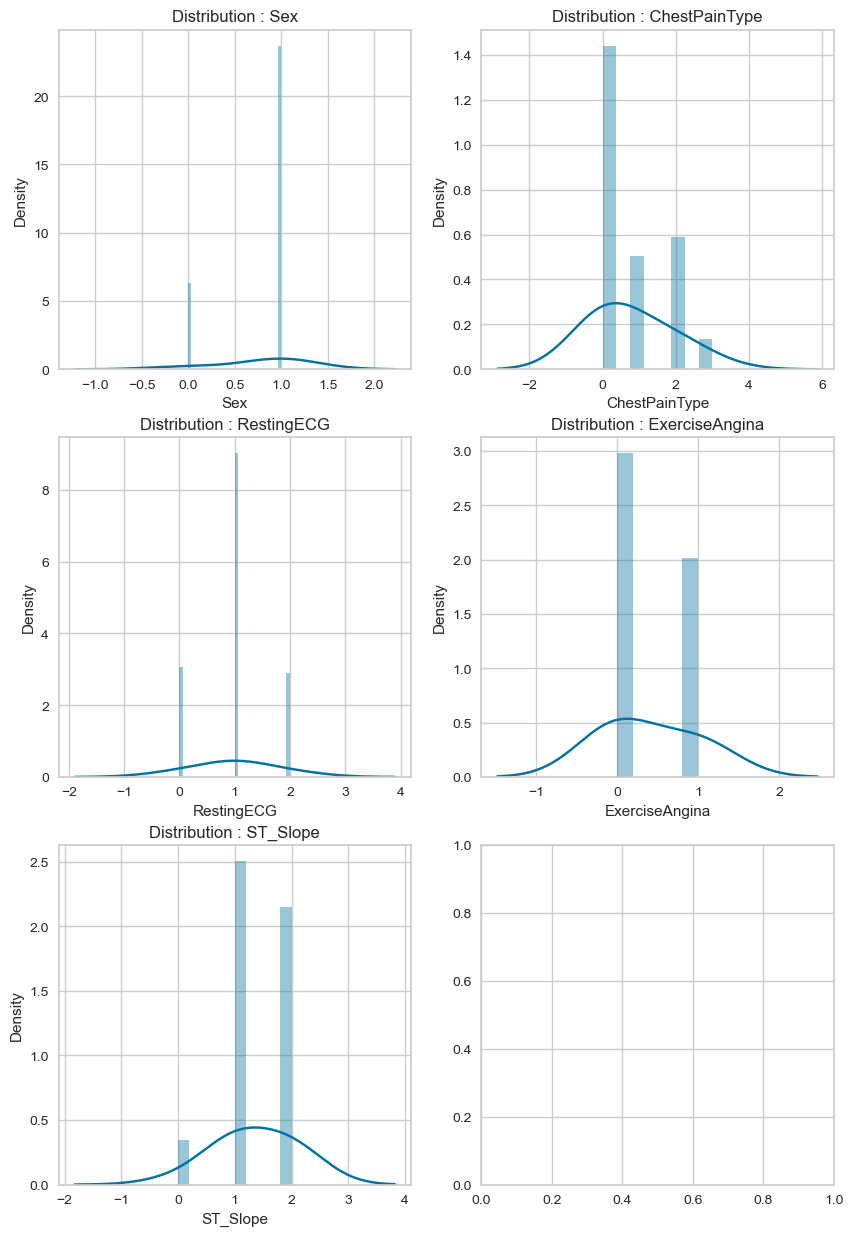

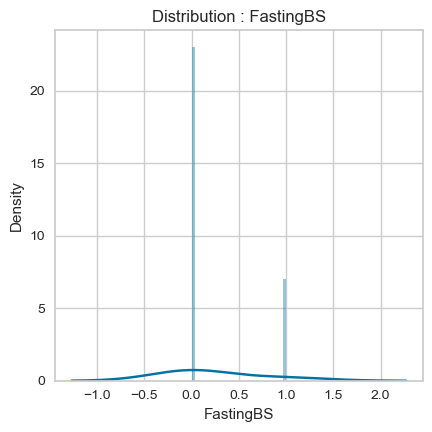

In [20]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categorical[len(categorical) - 1]],kde_kws = {'bw' : 1})
title = 'Distribution : ' + categorical[len(categorical) - 1]
plt.title(title);

All the categorical features are normally distributed

#### 3.3.2.1) Analysing categorical features vs target Variable (HeartDisease)

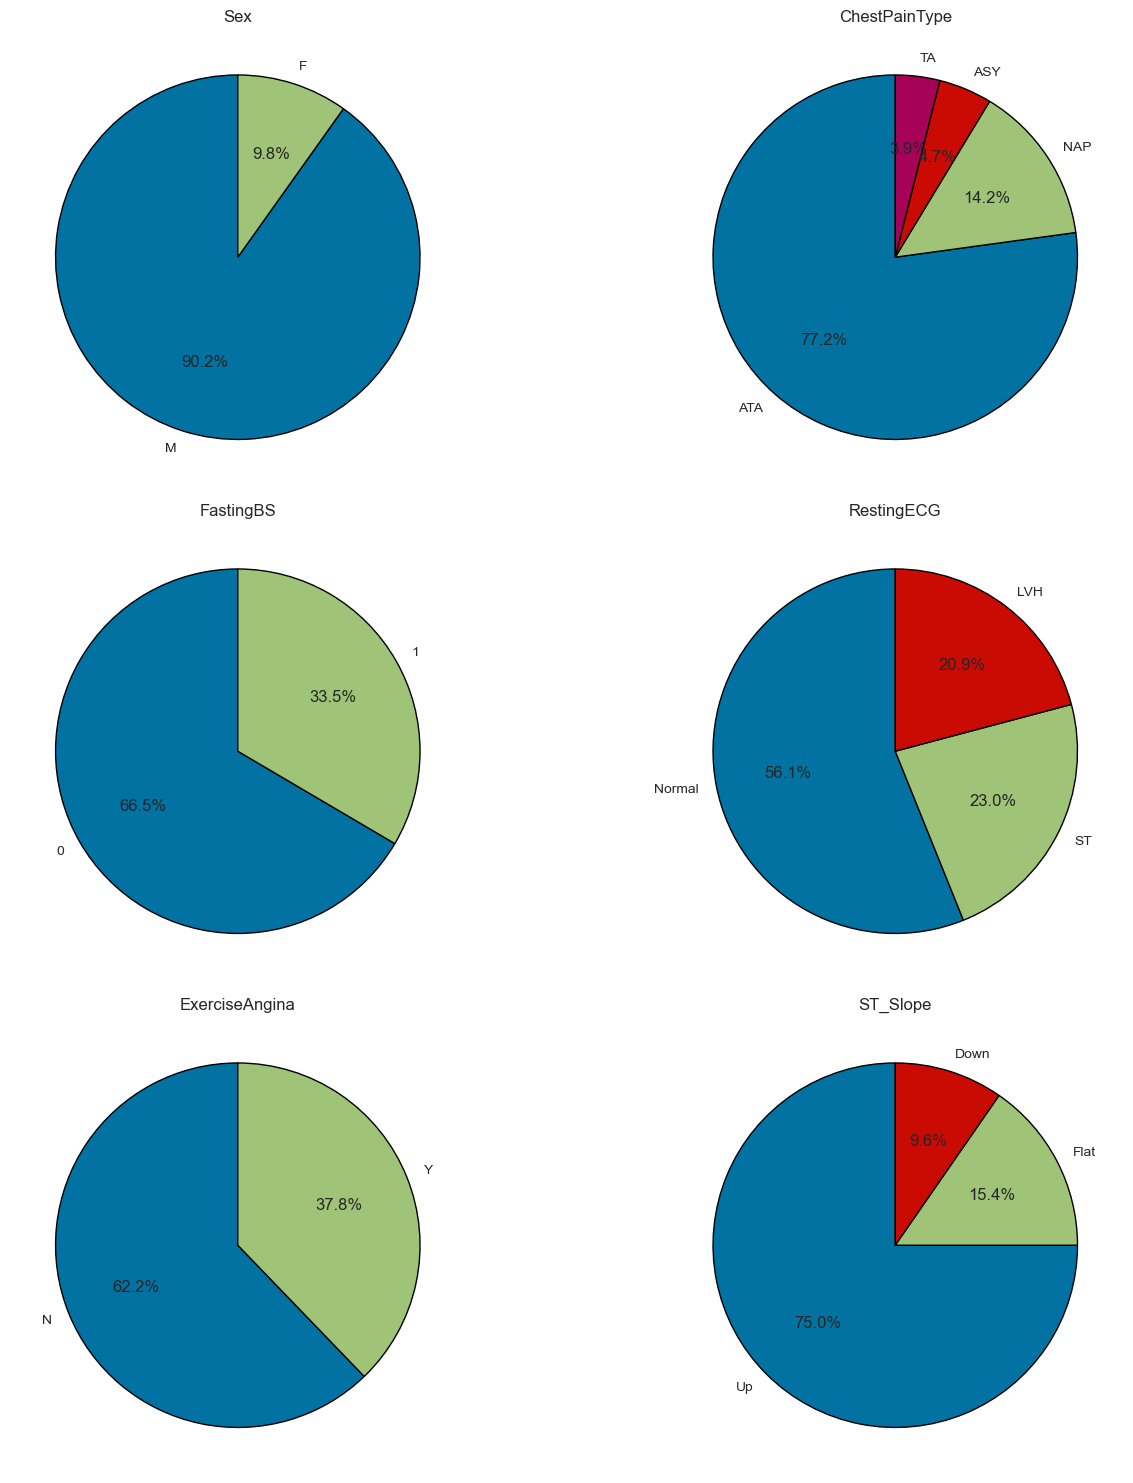

In [21]:
# Calculating percentages for each categorical feature
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
percentages = {}

for feature in categorical_features:
    percentages[feature] = (df[df['HeartDisease'] == 1][feature].value_counts(normalize=True) * 100).tolist()

# Plotting pie charts for each categorical feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, feature in enumerate(percentages.keys()):
    plt.subplot(3, 2, i + 1)
    plt.pie(percentages[feature], labels=df[feature].unique(), autopct='%1.1f%%', startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    plt.title(feature)
    
plt.tight_layout()
plt.show()


- Among individuals diagnosed with heart disease, a striking 90% are male.
- The ASY type of chest pain dominates, representing 77% of cases leading to heart diseases.
- Individuals with fasting blood sugar levels below 120 mg/dl exhibit a higher likelihood of having heart diseases.
- In terms of RestingECG, the Normal level constitutes a 56% likelihood of heart diseases compared to LVH and ST levels.
- The presence of Exercise Induced Angina signals the possibility of heart diseases.
- In ST_Slope readings, the Flat level comprises a substantial 75% proportion, potentially aiding in identifying underlying heart issues.

## 3.4) Summary of data visualisation and analysation

Heart disease-positive cases showcase a certain order or tendency in their categorical and numerical features:

<b>Categorical Features (Order):</b>

- Sex: Male tends to have a higher likelihood than Female.
- ChestPainType: ASY is more common than NAP, ATA, or TA.
- FastingBS: FBS < 120 mg/dl is more frequent than FBS > 120 mg/dl.
- RestingECG: Normal readings are more prevalent than ST or LVH.
- ExerciseAngina: Cases with Angina exceed those without.
- ST_Slope: Flat occurrences surpass Up or Down.

<b>Numerical Features (Range):</b>

- Age: Usually 50 years and above.
- RestingBP: Falls within the range of 95 to 170.
- Cholesterol: Ranges between 160 and 340.
- MaxHR: Typically seen between 70 and 180.
- Oldpeak: Generally observed within the range of 0 to 4.

# 4) Data preprocessing

## 4.1) One-hot encoding

One-hot encoding is a technique to convert categorical data into a binary format where each category is represented as a binary vector

In [22]:
# Current dataset information and structure
print(df.shape)
df.head()

(918, 16)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingBP_Group,Cholesterol_Group,MaxHR_Group,Oldpeak_Group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,28,28,34,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,32,18,31,2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,26,28,19,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,27,21,21,3
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,30,19,24,0


In [23]:
# Display information about the categorical columns
df[categorical].value_counts()

Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope  FastingBS
M    ASY            Normal      Y               Flat      0            84
     ATA            Normal      N               Up        0            59
     NAP            Normal      N               Up        0            40
     ASY            Normal      N               Flat      0            36
                                                Up        0            35
                                                                       ..
F    NAP            LVH         Y               Down      0             1
     ATA            ST          N               Up        1             1
                    Normal      Y               Up        1             1
                                N               Up        1             1
M    TA             ST          Y               Flat      0             1
Name: count, Length: 149, dtype: int64

Now, we need to perform one-hot encoding on categorical columns. We will first drop the first encoded column to prevent multicollinearity in certain models and to reduce the risk of redundant information. This results in having one fewer column in the resulting encoded DataFrame.

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
# Modified dataframe
print(df.shape)
df.head()

(918, 20)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingBP_Group,Cholesterol_Group,MaxHR_Group,Oldpeak_Group,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,28,28,34,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,32,18,31,2,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,26,28,19,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,27,21,21,3,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,30,19,24,0,True,False,True,False,True,False,False,False,True


With the exception of RestingECG and Cholestrol, all other features exhibit either a positive or negative association with HeartDisease.

# 5) Train & test split

We need to categorize the dataset's columns into input variables (X), representing features or attributes, and output variables (y) representing the patterns or targets to predict.

In [26]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

Now, the X and Y data will split into training and test sets. The training set will facilitate model preparation, while the test set will enable predictions for performance evaluation. This segmentation will be executed using the 'train_test_split()' function from the scikit-learn library. Additionally, specifying a seed for the random number generator ensures consistent data splits for reproducibility across executions of this example.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

# 6) Feature Transformation

## 6.1) Feature scaling

Feature scaling involves standardizing numerical features within a dataset to ensure uniformity and comparable scales across variables, aiding in model convergence and performance.

In [28]:
scaler = MinMaxScaler()
#This scaler is used for feature scaling, specifically to scale numerical features to a specified range (by default, [0, 1]).

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
#This method computes the scaling parameters (like mean and standard deviation for StandardScaler) based on the values in the training data and then scales (transforms) the training data accordingly.

In [30]:
X_test_scaled = scaler.transform(X_test)
#This method is used to transform the test data (X_test) using the same scaling parameters learned from the training data (X_train)

## 6.2) General Insights

In [31]:
# This function trains Decision Tree, Logistic Regression, and KNN classifiers and prints their respective training accuracies. 
def models(X_train, y_train, class_weight):
    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=class_weight)
    decision_tree.fit(X_train, y_train)
    
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight=class_weight, solver='liblinear')
    log.fit(X_train, y_train)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
    
    # Model Accuracy on Training Data
    print(f"\033[1m1) Decision Tree Training Accuracy:\033[0m {decision_tree}")
    print(f"\033[1m2) Logistic Regression Training Accuracy:\033[0m {log}")
    print(f"\033[1m3) KNN Training Accuracy:\033[0m {knn}")
  
    return decision_tree.score(X_train, y_train), log.score(X_train, y_train), knn.score(X_train, y_train)

In [32]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [33]:
# This code computes and stores the accuracy scores of different models under various conditions (basic, scaled, balanced) in a dataframe named "Scores."
Scores = pd.DataFrame(columns = ["DT_Acc", "LR_Acc", "KNN_Acc"])

print("\033[1mBASIC ACCURACY\033[0m")
Basic = [decision_tree_acc, log_acc, knn_acc] = models(X_train, y_train, None)
Scores.loc[0] = Basic

print("\n\033[1mSCALED ACCURACY WITHOUT BALANCED\033[0m")    
Scaled = [decision_tree_acc, log_acc, knn_acc] = models(X_train_scaled, y_train, None)
Scores.loc[1] = Scaled

print("\n\033[1mBASIC ACCURACY WITH BALANCED\033[0m")
Balanced = [decision_tree_acc, log_acc, knn_acc] = models(X_train, y_train, "balanced")
Scores.loc[2] = Balanced

print("\n\033[1mSCALED ACCURACY WITH BALANCED\033[0m")    
Scaled_Balanced = [decision_tree_acc, log_acc, knn_acc] = models(X_train_scaled, y_train, "balanced")
Scores.loc[3] = Scaled_Balanced

BASIC ACCURACY
1) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
2) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)


  File "C:\Users\lekha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(



SCALED ACCURACY WITHOUT BALANCED
1) Decision Tree Training Accuracy: DecisionTreeClassifier(criterion='entropy', random_state=101)
2) Logistic Regression Training Accuracy: LogisticRegression(random_state=101, solver='liblinear')
3) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

BASIC ACCURACY WITH BALANCED
1) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
2) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
3) KNN Training Accuracy: KNeighborsClassifier(n_neighbors=3)

SCALED ACCURACY WITH BALANCED
1) Decision Tree Training Accuracy: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=101)
2) Logistic Regression Training Accuracy: LogisticRegression(class_weight='balanced', random_state=101,
                   solver='liblinear')
3) KNN

In [34]:
# Visual representation of "Scores"
Scores = Scores.rename(index={'Basic': 0, 'Scaled': 1, 'Balanced': 2, 'Scaled_Balanced': 3})

Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')

,DT_Acc,LR_Acc,KNN_Acc
0,1.000000,0.866667,0.837179
1,1.000000,0.864103,0.912821
2,1.000000,0.866667,0.837179
3,1.000000,0.864103,0.912821


Decision trees consistently achieve perfect accuracy, scoring 100% consistently. Meanwhile, logistic regression and KNN exhibit varied accuracy but generally perform strongly, particularly in the second and fourth instances.

### 6.3) Addressing Skewness via PowerTransform

In [35]:
operations = [("scaler", MinMaxScaler()), ("power", PowerTransformer()), ("log", LogisticRegression(random_state=101))]
pipe_log_model = Pipeline(steps=operations)
pipe_log_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('power', PowerTransformer()),
  ('log', LogisticRegression(random_state=101))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'power': PowerTransformer(),
 'log': LogisticRegression(random_state=101),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'power__copy': True,
 'power__method': 'yeo-johnson',
 'power__standardize': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': None,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'l2',
 'log__random_state': 101,
 'log__solver': 'lbfgs',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [36]:
pipe_log_model.fit(X_train, y_train)
y_pred = pipe_log_model.predict(X_test)
y_train_pred = pipe_log_model.predict(X_train)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 10]
 [ 7 69]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.87      0.91      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



After examining the results following skewness adjustment, it's clear that this approach didn't significantly improve our model, particularly when compared to the outcomes achieved by the Logistic Classifier without using PowerTransform. Therefore, for the next stages of this analysis, we'll continue without addressing skewness, as it seems to offer minimal advantages for the results.

## 6.4) Assessing Model Accuracy Metrics

In [37]:
pipe_scores = cross_validate(pipe_log_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_pipe_scores = pd.DataFrame(pipe_scores, index = range(1, 11))

df_pipe_scores.head()

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.029037,0.000000,0.807692,0.791667,0.883721,0.835165
2,0.033248,0.000000,0.820513,0.822222,0.860465,0.840909
3,0.025026,0.000000,0.884615,0.886364,0.906977,0.896552
4,0.025275,0.007997,0.833333,0.875000,0.813953,0.843373
5,0.016851,0.016800,0.897436,0.888889,0.930233,0.909091


We created a pipeline that sequentially applies MinMaxScaler, PowerTransformer, and Logistic Regression models, then conducted cross-validation using this pipeline on the training data, and finally stored the evaluation metrics (accuracy, precision, recall, and F1 score) across different folds in a DataFrame for analysis.

The general insight from this data showcases the model's performance across different folds, indicating consistency or variations in the model's predictive capability.

In [38]:
# Computes the mean values of the performance metrics from the cross-validation
df_pipe_scores.mean()[2:]

test_accuracy     0.853846
test_precision    0.857311
test_recall       0.884249
test_f1           0.869920
dtype: float64

These averages represent the model's overall performance across the different folds in the cross-validation, giving an indication of its average predictive ability.

In [39]:
# evaluate a logistic regression model's accuracy
cv = RepeatedStratifiedKFold(n_splits=10, random_state=101)
n_scores = cross_val_score(pipe_log_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(f'Accuracy (mean) : {round(n_scores.mean()*100,3)}%, Standard Deviation : {round(n_scores.std()*100,3)}')

Accuracy (mean) : 85.718%, Standard Deviation : 3.37


Now, it's time to initiate model training. After selecting suitable classifiers from the scikit-learn library, we proceed to create and train them using our prepared training dataset. Leveraging the scikit-learn API, models are trained with the model.fit() function. Subsequently, we employ the model.predict() function to generate predictions on the test dataset.

# 7) Modelling

## 7.1) Decision Tree (DT)

### 7.1.1) Modelling DT using Default Parameters

This code snippet below demonstrates the creation and training of a Decision Tree Classifier using balanced class weights and a specific random state. It then predicts the target values for both the test and train sets. Additionally, it evaluates various performance metrics such as F1 score, accuracy, recall, and ROC AUC score. The confusion matrix and classification report for the test set are printed to analyze the classifier's performance on this data. Finally, it calls a function named train_val to assess the model's performance on both train and test sets.

In [40]:
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print()

confusion_matrix(y_test, y_pred)

train_val(y_train, y_train_pred, y_test, y_pred)

[[44 18]
 [17 59]]

              precision    recall  f1-score   support

           0       0.72      0.71      0.72        62
           1       0.77      0.78      0.77        76

    accuracy                           0.75       138
   macro avg       0.74      0.74      0.74       138
weighted avg       0.75      0.75      0.75       138




,train_set,test_set
Accuracy,1.0,0.746377
Precision,1.0,0.766234
Recall,1.0,0.776316
f1,1.0,0.771242


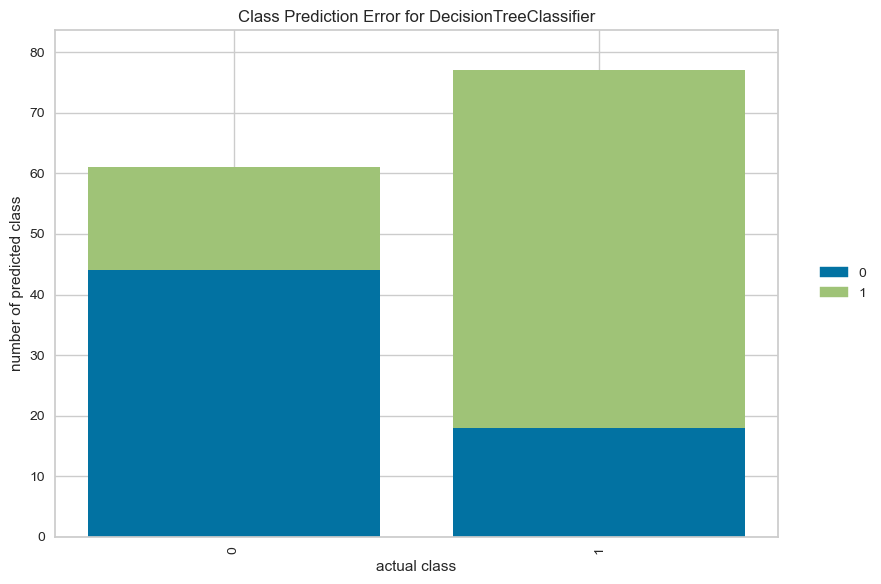

In [41]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

- The model demonstrates relatively good performance on both the training and test sets, with slightly lower scores on the test set, indicating generalizability.
- Precision, recall, and F1-score are higher for class "1" than class "0," suggesting better predictive capability for the positive class.
- Overall accuracy on the test set is around 74.6%, indicating the proportion of correct predictions.

### 7.1.2) Cross-validating DT Model

In [42]:
#provides a comprehensive view of how the model performs across multiple iterations of training and validation sets
dt_xvalid_model = DecisionTreeClassifier(max_depth=None, random_state=42)

dt_xvalid_model_scores = cross_validate(dt_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
dt_xvalid_model_scores = pd.DataFrame(dt_xvalid_model_scores, index = range(1, 11))

dt_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.000000,0.000000,0.782051,0.825000,0.767442,0.795181
2,0.000000,0.015762,0.756410,0.772727,0.790698,0.781609
3,0.000000,0.011211,0.782051,0.861111,0.720930,0.784810
4,0.000000,0.010675,0.705128,0.708333,0.790698,0.747253
5,0.004067,0.006163,0.730769,0.843750,0.627907,0.720000
6,0.003067,0.000000,0.717949,0.733333,0.767442,0.750000
7,0.008293,0.008675,0.794872,0.800000,0.837209,0.818182
8,0.000000,0.009098,0.756410,0.772727,0.790698,0.781609
9,0.000000,0.012680,0.769231,0.861111,0.704545,0.775000
10,0.003573,0.006108,0.858974,0.883721,0.863636,0.873563


In [43]:
dt_xvalid_model_scores.mean()[2:]

test_accuracy     0.765385
test_precision    0.806181
test_recall       0.766121
test_f1           0.782721
dtype: float64

### 7.1.3) DT feature importance

In [44]:
# calculates the scores assigned to each feature by the Decision Tree Classifier. 
DT_model.feature_importances_

array([0.0804113 , 0.0593962 , 0.04582981, 0.0291426 , 0.10794186,
       0.04572934, 0.02250909, 0.08281583, 0.01471373, 0.0125383 ,
       0.0312367 , 0.01095969, 0.02680743, 0.        , 0.01517614,
       0.00424299, 0.03142039, 0.01015882, 0.36896978])

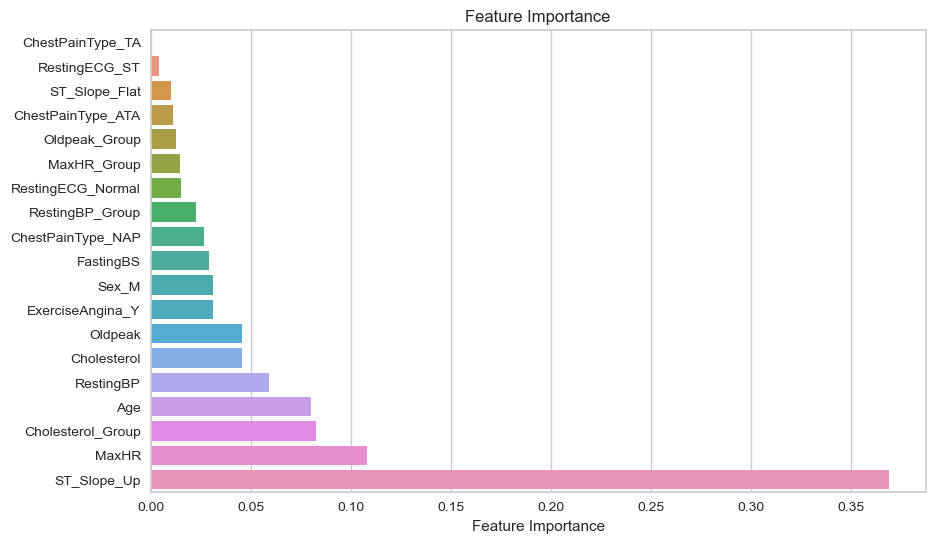

In [45]:
# Plots the information above into bar graph
DT_feature_imp = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
sns.barplot(x=DT_feature_imp["Feature Importance"], y=DT_feature_imp.index)
plt.title("Feature Importance")
plt.show()

We're exploring the impact of dropping the most influential feature on our model. Sometimes, an excessively weighted feature can lead to overfitting. To understand its effect, we'll remove this highly influential feature and re-evaluate our model's scores. This process allows us to gauge how much this particular feature influences our model's performance.

In [46]:
#This process aims to investigate the model's performance after removing the feature "ST_Slope_Up" from the dataset.
X1 = X.drop(columns = ["ST_Slope_Up"])
y1 = df["HeartDisease"]

In [47]:
#shows all the columns in X1
X1.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'RestingBP_Group', 'Cholesterol_Group', 'MaxHR_Group', 'Oldpeak_Group',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat'],
      dtype='object')

In [48]:
#split new train and test dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=42)

In [49]:
#Perform the predictions and statistical analysis
operations = [("scaler", MinMaxScaler()), ("dt", DecisionTreeClassifier(class_weight="balanced", random_state=42))]

DT_pipe_model = Pipeline(steps=operations)
DT_pipe_model.get_params()
DT_pipe_model.fit(X1_train, y1_train)

y1_pred = DT_pipe_model.predict(X1_test)
y1_train_pred = DT_pipe_model.predict(X1_train)

print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))

rf_pipe_f1 = f1_score(y1_test, y1_pred)
rf_pipe_acc = accuracy_score(y1_test, y1_pred)
rf_pipe_recall = recall_score(y1_test, y1_pred)
rf_pipe_auc = roc_auc_score(y1_test, y_pred)

print(confusion_matrix(y1_test, y1_pred))
print()
print(classification_report(y1_test, y1_pred))
print()

confusion_matrix(y_test, y_pred)

train_val(y1_train, y1_train_pred, y1_test, y1_pred)

[[44 12]
 [18 64]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        56
           1       0.84      0.78      0.81        82

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.78      0.78       138

[[44 12]
 [18 64]]

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        56
           1       0.84      0.78      0.81        82

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.79      0.78      0.78       138




,train_set,test_set
Accuracy,1.0,0.782609
Precision,1.0,0.842105
Recall,1.0,0.780488
f1,1.0,0.810127


Overall, removing the heavily weighted feature didn't yield any meaningful improvement. There was a significant decrease in both True Positive predictions and False Negative predictions.

### 7.1.4) Finding best parameters and Precision-Recall Curve

In [50]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [51]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [52]:
print('Best parameter: ', DT_grid_model.best_params_)
print('Best Estimator: ', DT_grid_model.best_estimator_)

Best parameter:  {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Estimator:  DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=7,
                       min_samples_leaf=2, min_samples_split=5, random_state=42,
                       splitter='random')


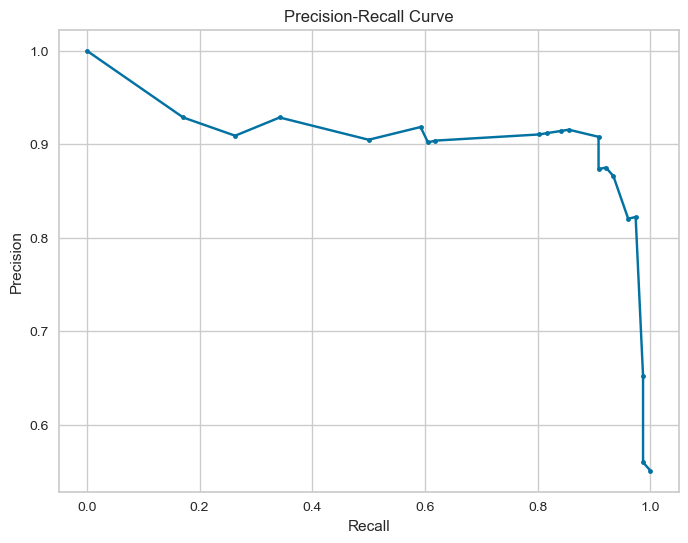

In [53]:
y_scores = DT_grid_model.predict_proba(X_test_scaled)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## 7.2) Logistic Regression (LR)

### 7.2.1) Modelling LR using Default Parameters

In [54]:
#Perform the predictions and statistical analysis
LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
LR_model.fit(X_train_scaled, y_train)
y_pred = LR_model.predict(X_test_scaled)
y_train_pred = LR_model.predict(X_train_scaled)

log_f1 = f1_score(y_test, y_pred)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

confusion_matrix(y_test,y_pred)

train_val(y_train, y_train_pred, y_test, y_pred)

[[52 10]
 [ 7 69]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        62
           1       0.87      0.91      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138





,train_set,test_set
Accuracy,0.865385,0.876812
Precision,0.864143,0.873418
Recall,0.898148,0.907895
f1,0.880817,0.890323


The accuracy, precision, recall, and F1-score for both the training and test sets are provided, showing consistent performance between the training and test sets, suggesting a well-generalized model.

In [55]:
# Generates the predicted probabilities for each instance in the test set using a Logistic Regression model.
y_pred_proba = LR_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test.set_index(y_test.index), y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingBP_Group,Cholesterol_Group,MaxHR_Group,Oldpeak_Group,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease,pred,pred_proba
178,37,130,194,0,150,0.0,26,19,30,0,...,True,False,True,False,False,False,True,0,0,0.068483
541,76,104,113,0,120,3.5,20,11,24,7,...,True,False,False,False,False,False,False,1,1,0.596863
159,54,160,195,0,130,1.0,32,19,26,2,...,False,False,False,True,False,False,True,0,0,0.112571
326,45,110,0,0,138,-0.1,22,0,27,0,...,True,False,True,False,False,False,True,0,0,0.141754
591,58,100,213,0,110,0.0,20,21,22,0,...,False,False,False,True,False,False,True,0,0,0.301690


### 7.2.2) Cross-validating LR Model

In [56]:
# Conducts cross-validation using Logistic Regression on the training dataset.
log_xvalid_model = LogisticRegression()
log_xvalid_model_scores = cross_validate(log_xvalid_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',                                                                    'f1'], cv = 10)
log_xvalid_model_scores = pd.DataFrame(log_xvalid_model_scores, index = range(1, 11))
log_xvalid_model_scores.mean()[2:]

test_accuracy     0.857692
test_precision    0.861616
test_recall       0.886575
test_f1           0.873121
dtype: float64

In [57]:
DT_grid_model.fit(X_train_scaled, y_train)
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print()

confusion_matrix(y_test,y_pred)

train_val(y_train, y_train_pred, y_test, y_pred)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[[55  7]
 [ 7 69]]

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        62
           1       0.91      0.91      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138




,train_set,test_set
Accuracy,0.870513,0.898551
Precision,0.876993,0.907895
Recall,0.891204,0.907895
f1,0.884041,0.907895


The model appears to perform consistently well across various evaluation metrics on both the training and test datasets, indicating its robustness in predicting heart disease.

### 7.2.3) Precision-Recall Curve

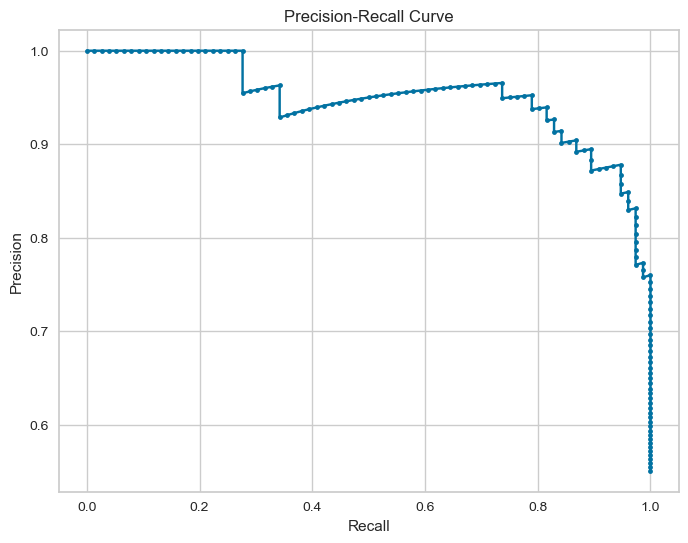

In [58]:
y_scores = LR_model.predict_proba(X_test_scaled)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### 7.2.4) Finding the Optimal Threshold Value

In [59]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [60]:
# Finding the optimal threshold that maximizes the difference between true positive and false positive rates
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.46422329057450207

In [61]:
# Organizes the ROC curve data into a DataFrame 
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)

In [62]:
# Extracts the values associated with the optimal threshold index
df_roc_curve.iloc[optimal_idx]

fp_rate       0.161290
tp_rate       0.947368
thresholds    0.464223
Name: 20, dtype: float64

The results indicate that at the identified threshold of approximately 0.466:

- The false positive rate is around 0.161.
- The true positive rate is notably higher, reaching about 0.934.

These values signify the trade-off between correctly identifying true positives and incorrectly classifying negatives for the chosen threshold. A high true positive rate and a relatively low false positive rate at this threshold suggest a good balance in the model's classification performance.

## 7.3)  K-Nearest Neighbor (KNN)

### 7.3.1) Modelling KNN using Default Parameters

In [63]:
# #Perform the predictions and statistical analysis without using KNN library
# Euclidean distance function
def euclidean_distance(p1, p2):
    distance = 0.0
    for i in range(len(p1)):
        distance += (p1[i] - p2[i]) ** 2
    return distance ** 0.5

# KNN algorithm
def knn(train_data, test_data, k):
    predictions = []
    for test_instance in test_data:
        distances = []
        for train_instance in train_data:
            dist = euclidean_distance(train_instance[:-1], test_instance)
            distances.append((train_instance, dist))
        distances.sort(key=lambda x: x[1])
        neighbors = distances[:k]
        
        # Count the votes for each class
        votes = {}
        for neighbor in neighbors:
            label = neighbor[0][-1]
            if label in votes:
                votes[label] += 1
            else:
                votes[label] = 1
        
        # Find the majority class
        majority_class = max(votes, key=votes.get)
        predictions.append(majority_class)
    
    return predictions

# from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score, roc_auc_score

def calculate_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return f1, acc, recall, auc

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are available

# Train the model using your training data
k_value = 5  # Number of neighbors
# Combine features and labels for training data
training_data = []
for features, label in zip(X_train_scaled, y_train):
    combined_data = features + [label]  # Combine features and label
    training_data.append(combined_data)

# Get predictions for the test set
predictions = knn(training_data, X_test_scaled, k_value)

# Get predictions for the training set (for evaluation)
train_predictions = knn(training_data, X_train_scaled, k_value)

# Evaluate the model
# from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

knn_acc = accuracy_score(y_test, predictions)
knn_auc = roc_auc_score(y_test, predictions)

# Assuming y_test and y_pred are available
conf_matrix = confusion_matrix(y_test, y_pred)
knn_f1, knn_acc, knn_recall, knn_auc = calculate_metrics(y_test, y_pred)

# Printing confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()

# Perform train_val function
train_val(y_train, y_train_pred, y_test, y_pred)


Confusion Matrix:
[[55  7]
 [ 7 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        62
           1       0.91      0.91      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138




,train_set,test_set
Accuracy,0.870513,0.898551
Precision,0.876993,0.907895
Recall,0.891204,0.907895
f1,0.884041,0.907895


In [64]:
KNN_model = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
KNN_model.fit(X_train_scaled, y_train)
y_pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

y_pred_proba = KNN_model.predict_proba(X_test_scaled)
pd.DataFrame(y_pred_proba)
my_dict = {"Actual": y_test, "Pred": y_pred, "Proba_1": y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(5)

,Actual,Pred,Proba_1,Proba_0
499,1,1,1.0,0.0
711,0,1,1.0,0.0
525,0,0,0.0,1.0
580,1,1,1.0,0.0
783,0,1,0.6,0.4


### 7.3.2) Cross-validating KNN Model

In [65]:
# provides the mean accuracy and precision scores from the cross-validation procedure
knn_xvalid_model = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_validate(knn_xvalid_model, X_train_scaled, y_train, scoring=["accuracy", "precision"], cv=10)

accuracy_mean = np.mean(cv_scores['test_accuracy'])
precision_mean = np.mean(cv_scores['test_precision'])

accuracy_mean, precision_mean

(0.864102564102564, 0.8601547508132281)

### 7.3.3) Identifying Suitable K Values Using the Elbow Method

In [66]:
# Test error rates
test_error_rates = []

for k in range(1, 30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train_scaled, y_train) 
   
    y_test_pred = KNN_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

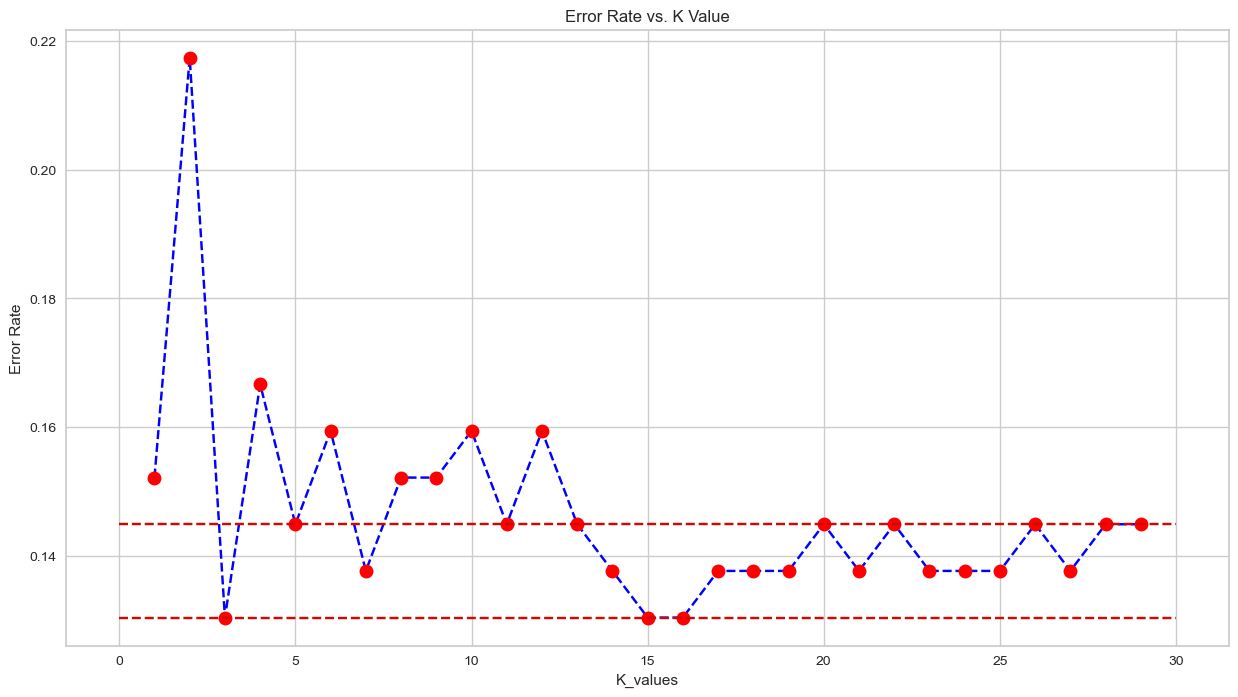

In [67]:
#Plotting k_values with test error rates 
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.14492753623188404, xmin=0, xmax=30, colors='r', linestyles="--")
plt.hlines(y=0.13043478260869568, xmin=0, xmax=30, colors='r', linestyles="--");

In [68]:
# WITH K=26

KNN_model = KNeighborsClassifier(n_neighbors=26, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn26_f1 = f1_score(y_test, y_pred)
knn26_acc = accuracy_score(y_test, y_pred)
knn26_recall = recall_score(y_test, y_pred)
knn26_auc = roc_auc_score(y_test, y_pred)

print('WITH K=26')
print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print()

confusion_matrix(y_test,y_pred)

train_val(y_train, y_train_pred, y_test, y_pred)

WITH K=26

[[50 12]
 [ 8 68]]

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        62
           1       0.85      0.89      0.87        76

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138




,train_set,test_set
Accuracy,0.870513,0.855072
Precision,0.863736,0.850000
Recall,0.909722,0.894737
f1,0.886133,0.871795


In [69]:
# WITH K=13

KNN_model = KNeighborsClassifier(n_neighbors=13, p=2)
KNN_model.fit(X_train_scaled, y_train)
pred = KNN_model.predict(X_test_scaled)
y_train_pred = KNN_model.predict(X_train_scaled)

knn13_f1 = f1_score(y_test, y_pred)
knn13_acc = accuracy_score(y_test, y_pred)
knn13_recall = recall_score(y_test, y_pred)
knn13_auc = roc_auc_score(y_test, y_pred)

print('WITH K=13')
print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))
print()

confusion_matrix(y_test,y_pred)

train_val(y_train, y_train_pred, y_test, y_pred)

WITH K=13

[[50 12]
 [ 8 68]]

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        62
           1       0.85      0.89      0.87        76

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138




,train_set,test_set
Accuracy,0.867949,0.855072
Precision,0.861538,0.850000
Recall,0.907407,0.894737
f1,0.883878,0.871795


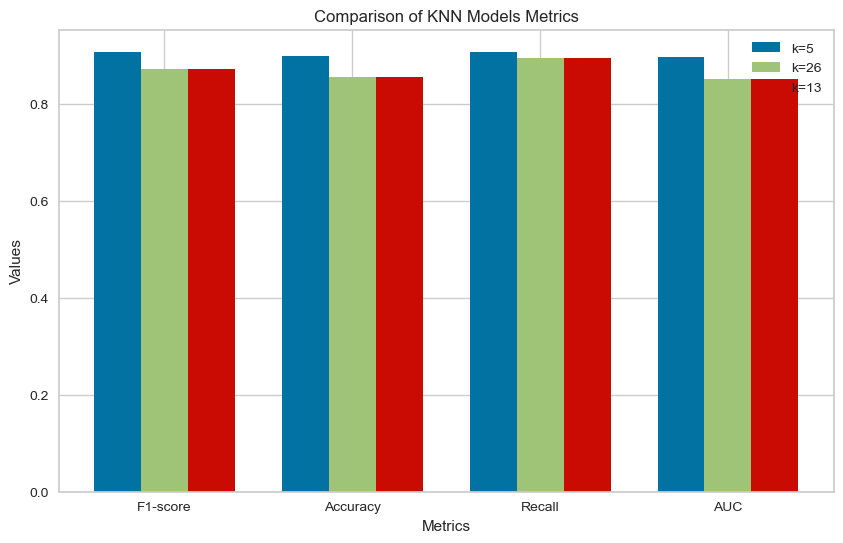

In [70]:
#Comparing k=5,26 and 13

data = {
    'Metric': ['F1-score', 'Accuracy', 'Recall', 'AUC'],
    'k=5': [knn_f1, knn_acc, knn_recall, knn_auc],
    'k=26': [knn26_f1, knn26_acc, knn26_recall, knn26_auc],
    'k=13': [knn13_f1, knn13_acc, knn13_recall, knn13_auc]  # If available
}

comparison_df = pd.DataFrame(data)

metrics = ['F1-score', 'Accuracy', 'Recall', 'AUC']
k5_metrics = [knn_f1, knn_acc, knn_recall, knn_auc]
k26_metrics = [knn26_f1, knn26_acc, knn26_recall, knn26_auc]
k13_metrics = [knn13_f1, knn13_acc, knn13_recall, knn13_auc]  # If available

bar_width = 0.25
index = range(len(metrics))

plt.bar(index, k5_metrics, bar_width, label='k=5')
plt.bar([i + bar_width for i in index], k26_metrics, bar_width, label='k=26')
plt.bar([i + 2 * bar_width for i in index], k13_metrics, bar_width, label='k=13')  # If available

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of KNN Models Metrics')
plt.xticks([i + bar_width for i in index], metrics)
plt.legend()
plt.show()


k=5 is the best among all the others

### 7.3.4)  Precision-Recall Curve

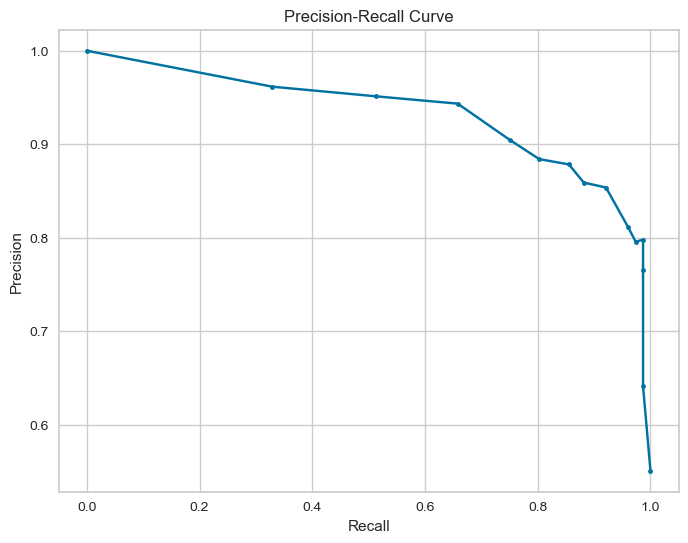

In [71]:
y_scores = KNN_model.predict_proba(X_test_scaled)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 8) Comparison and evaluation of models

In [72]:
compare = pd.DataFrame({
    "Model": ["Decision Tree", "KNN", "Logistic Regression"],
    "F1": [dt_grid_f1, knn_f1, log_f1],
    "Recall": [dt_grid_recall, knn_recall, log_recall],
    "Accuracy": [dt_grid_acc, knn_acc, log_acc],
    "ROC_AUC": [dt_grid_auc, knn_auc, log_auc]
})

print(compare)

                 Model        F1    Recall  Accuracy   ROC_AUC
0        Decision Tree  0.907895  0.907895  0.898551  0.897496
1                  KNN  0.907895  0.907895  0.898551  0.897496
2  Logistic Regression  0.890323  0.907895  0.876812  0.873302


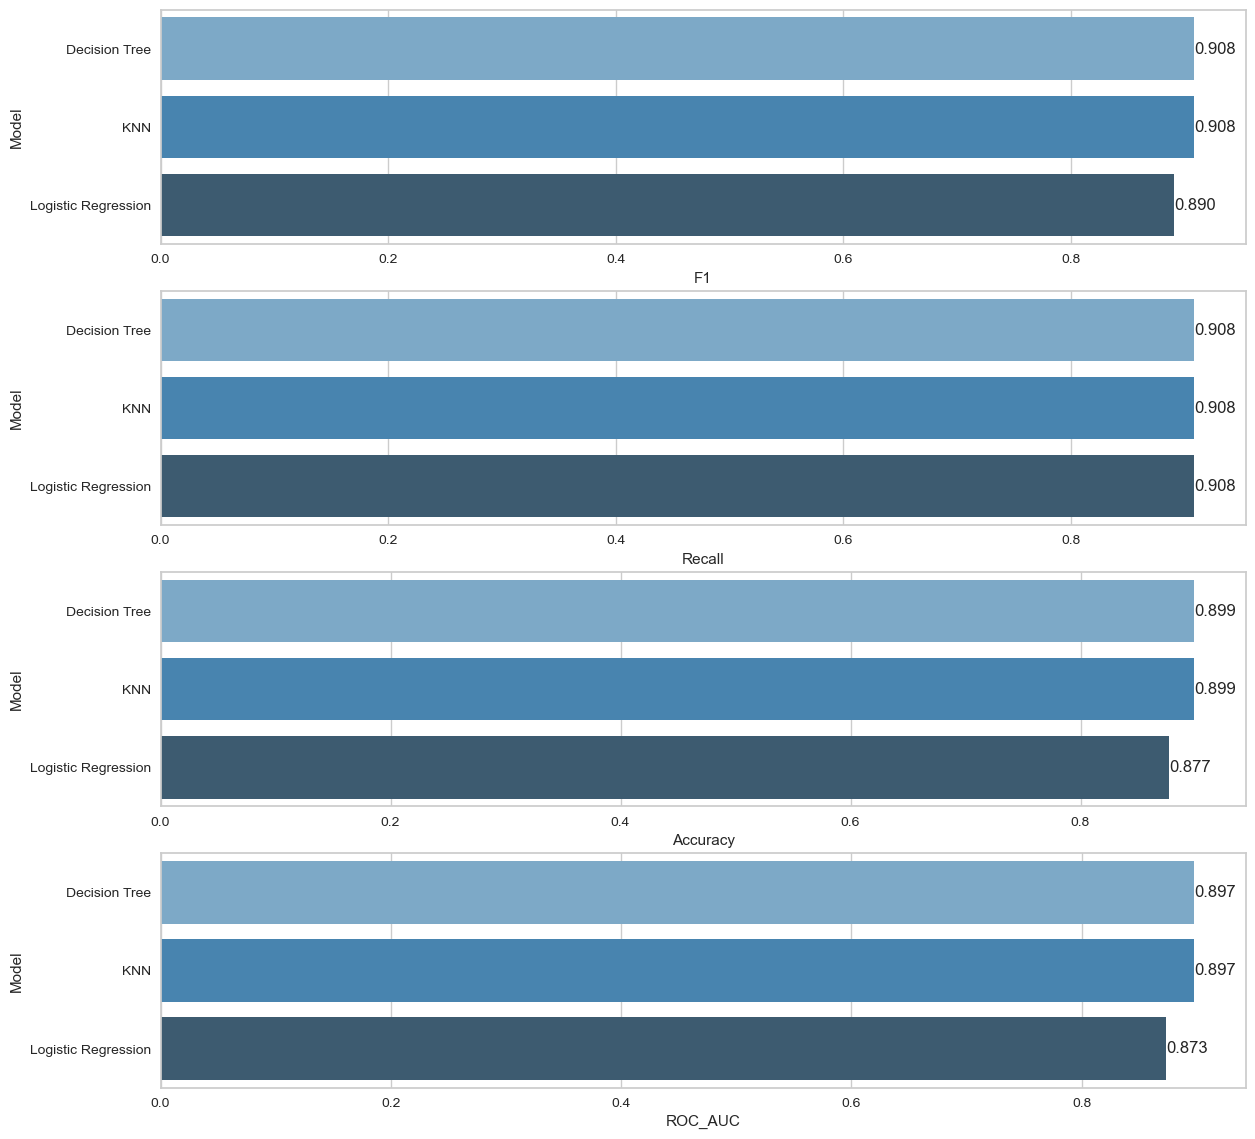

In [73]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                               
                p.get_y() + p.get_height() / 2,      
                '{:1.3f}'.format(width),             
                ha = 'left',                         
                va = 'center')                       
    
plt.figure(figsize=(14,14))
plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

**Evaluation of the models**

Both Decision Tree and KNN models demonstrate very similar and high performance across F1-score, Recall, Accuracy, and ROC-AUC metrics. They showcase an F1-score and Recall of around 0.908, indicating their strong ability to balance precision and recall.

Logistic Regression, while still performing well, shows slightly lower metrics compared to the other two models, with an F1-score and Recall around 0.890 and an Accuracy of 0.877.

All models show consistent and reliable performance across the metrics evaluated, with Decision Tree and KNN edging slightly ahead in F1-score and Recall.

# 9) Conclusion

Throughout this study:

- The primary focus was predicting heart disease presence based on factors like gender, age, and various test results using various classification models.
- Thorough exploratory analysis (EDA) was conducted on the dataset.
- No missing values were identified in the dataset.
- Detailed analysis of both the target variable and features was performed.
- Categorical variables were encoded into dummy variables for model compatibility.
- Efforts to mitigate skewness were made, but results showed negligible impact on model performance. Hence, skewness handling was disregarded in subsequent analyses.
- Cross-validation was employed to assess the models derived from training sets, ensuring robustness.
- A visual examination of the model outcomes aided in identifying the best model, which turned out to be the **Decision Tree and KNN**.

# 10) References

- Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
- Load datset: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.htmlhttps
- Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html